*Dataset credit: Troels C. Petersen (NBI, KU))*

# Decission trees hand-in

Import libraries and functions

In [1]:
import sys
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

Load dataset

In [3]:
dataset_path = 'Aleph_dataset.csv'
data = pd.read_csv(dataset_path, index_col = 0)

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


## Classification task

Train a tree classifier to classify the results from electron-positron collisions into b-quarks and non b-quarks —don’t panic if you don’t know what this means, just think of two categories 0 and 1. In other words, train a decision tree that acts as function mapping a set of input features X to an output Y which represents a binary category.

The column *isb* is the category we want to predict: 0 if it's not a b-quark and 1 if it is a b-quark. Therefore we need to split the loaded data into the rest of feature variables and that column.

In [4]:
feature_columns = data.columns
input_variables = data.columns[feature_columns != 'isb']
input_data      = data[input_variables]
truth           = data['isb']
print(input_variables)

Index(['energy', 'cTheta', 'phi', 'prob_b', 'spheri', 'pt2rel', 'multip',
       'bqvjet', 'ptlrel'],
      dtype='object')


Let's check the data that we are going to feed the tree model to predict the categories:

In [5]:
input_data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003


Let us now divide the truth and input_data into two parts; a training sample and a validation sample:

In [6]:
input_train, input_validation, truth_train, truth_validation = train_test_split(input_data, truth, test_size=0.2)

### Hand-in tasks:

1. Define a model `DecisionTreeClassifier`
2. Fit it the data
3. For the trained model, print the model prediction score on the validation split
4. Display importance of each input feature to the predictions using `feature_importances_`  attribute
5. Plot the decission surface over the top two features
6. Generate the confusion matrix, ROC curve and AUC value of the trained model using `sklearn.metrics.confusion_matrix`, `sklearn.metrics.roc_curve` and `sklearn.metrics.auc`
7. Try to improve the performance of the model by choosing differnt model parameters.
8. *Bonus* : Explore how the model parameters `max_depth`  and `min_samples_leaf` affects the overfitting of the model.
9. *Bonus* : Display the decision `tree.plot_tree(model, max_depth=2)` up to sensible depth and inspect it

In [11]:
# define the decision tree classifier and fit the data
model = DecisionTreeClassifier(max_depth=2)
model.fit(input_train, truth_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
# print the model prediction score on the validation split
print(model.score(input_validation, truth_validation))

0.8810715337062114


In [13]:
#Display importance of each input feature to the predictions using feature_importances_ attribute
print(model.feature_importances_)

# print importance score and feature name as well
for feature, importance in zip(input_variables, model.feature_importances_):
    print(feature, importance)

[0.         0.         0.         0.93630131 0.         0.
 0.         0.06369869 0.        ]
energy 0.0
cTheta 0.0
phi 0.0
prob_b 0.9363013146434139
spheri 0.0
pt2rel 0.0
multip 0.0
bqvjet 0.06369868535658607
ptlrel 0.0


In [15]:
Generate the confusion matrix, ROC curve and AUC value of the trained model using sklearn.metrics.confusion_matrix, sklearn.metrics.roc_curve and sklearn.metrics.auc top 2 features
top2_features = [input_variables[i] for i in top2_indices]

print(top2_features)


['bqvjet', 'prob_b']


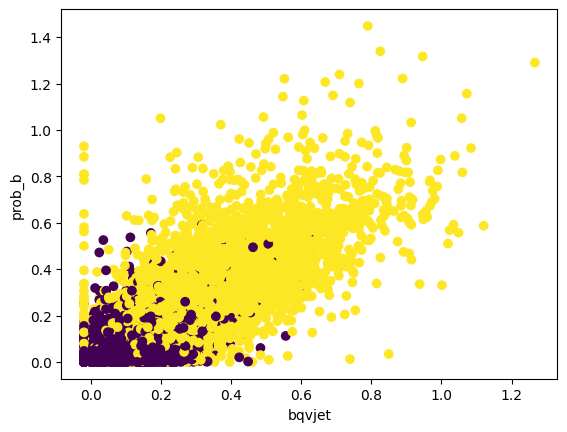

In [16]:
# Plot the decission surface over the top two features

plt.scatter(input_train[top2_features[0]], input_train[top2_features[1]], c=truth_train)
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.show()Plot the decission surface over the top two features

In [20]:
# Generate the confusion matrix, ROC curve and AUC value of the trained model using sklearn.metrics.confusion_matrix, sklearn.metrics.roc_curve and sklearn.metrics.auc
y_pred = model.predict(input_validation)
cm = confusion_matrix(truth_validation, y_pred)
print('Confusion Matrix: ',cm)

fpr, tpr, thresholds = roc_curve(truth_validation, y_pred)
roc_auc = auc(fpr, tpr)
print('ROC Curve: ',roc_auc)

Confusion Matrix:  [[5041  256]
 [ 552  945]]
ROC Curve:  0.7914666410411914


In [25]:
# Try to improve the performance of the model by choosing differnt model parameters.
model = DecisionTreeClassifier(max_depth=7)
model.fit(input_train, truth_train)
print(model.score(input_validation, truth_validation))

0.8934353841624963


In [28]:
for i in range (5,10):
  for j in range (5,10):
    model = DecisionTreeClassifier(max_depth=i, min_samples_leaf = j)
    model.fit(input_train, truth_train)
    print(model.score(input_validation, truth_validation))

0.8924050632911392
0.8924050632911392
0.8922578745952311
0.8924050632911392
0.8924050632911392
0.8935825728584045
0.8934353841624963
0.8934353841624963
0.8934353841624963
0.8935825728584045
0.89314100677068
0.8922578745952311
0.8925522519870474
0.8916691198115985
0.892110685899323
0.8903444215484251
0.8899028554607006
0.890197232852517
0.8894612893729762
0.8894612893729762
0.8890197232852517
0.8879894024138946
0.8881365911098028
0.8885781571975272
0.8887253458934354


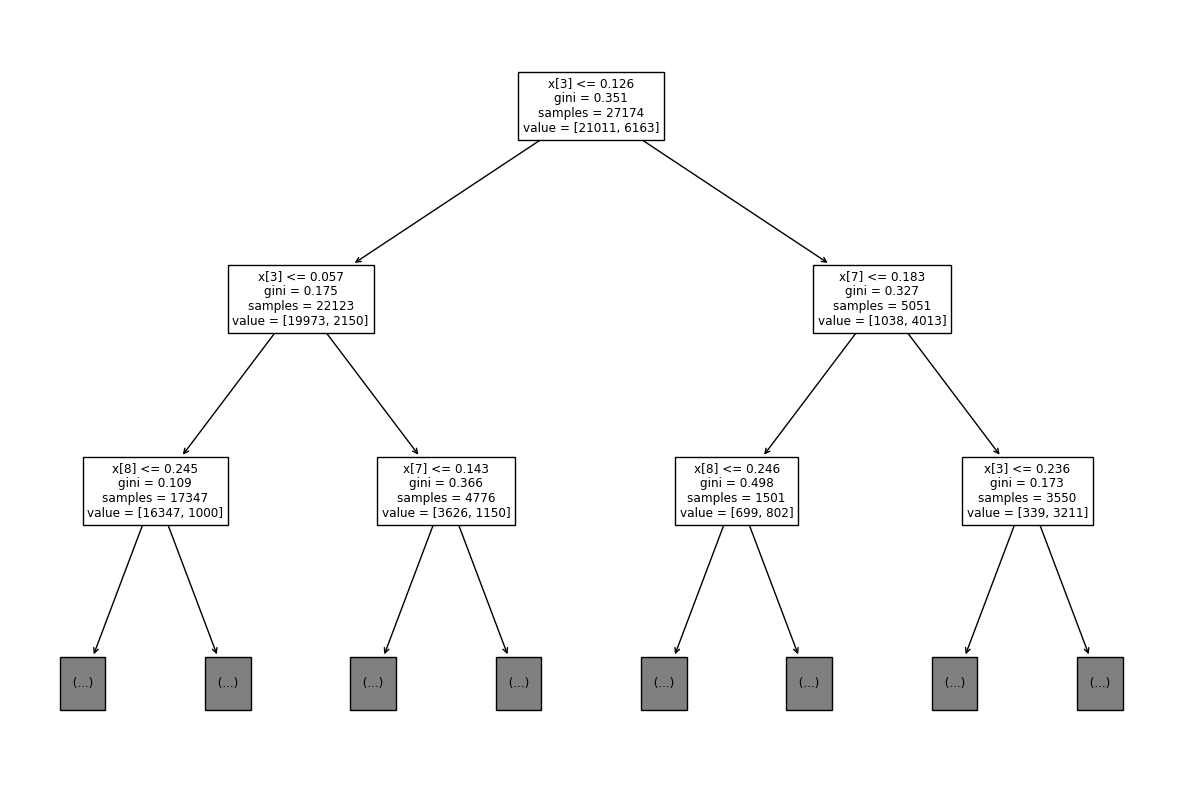

In [29]:
# Display the decision tree.plot_tree(model, max_depth=2) up to sensible depth and inspect it

plt.figure(figsize=(15,10))
sk.tree.plot_tree(model, max_depth=2)
plt.show()

## Regression task

The goal of the regression task is to predict the energy of each particles collision based on the variables.

### Hand-in tasks:

1. Define a regression tree model using `DecisionTreeRegressor` and fit it to predict the energy of the collions
3. For the trained model, visualise the model predictions vs the real values and print the obtained loss
4. Report importance of each feature using `feature_importances_`  attribute  
5. Evaluate your model on the training split and figure out what depths the tree need to perfectly predict the training data split.
6. Try to improve the performance of the model on the validation split by choosing different model parameters (if you're familiar with it, feel free to use k-fold Cross-Validation)
7. *Bonus*: Predict two any features —e.g. energy and another one— based on the rest. [Here you can find an example of Multi-output ree regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py).

In [30]:
# Define a regression tree model using DecisionTreeRegressor and fit it to predict the energy of the collions
model = DecisionTreeRegressor()
model.fit(input_train, truth_train)

DecisionTreeRegressor()

In [35]:
# For the trained model, visualise the model predictions vs the real values and print the obtained loss

y_pred = model.predict(input_validation)
loss = np.mean((truth_validation - y_pred)**2)
print(loss)

0.1535178098322049


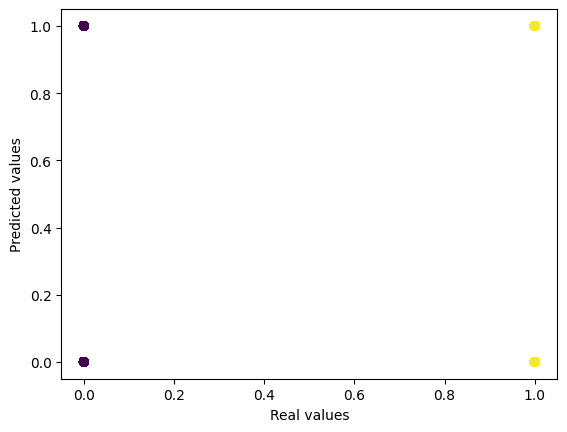

In [36]:
# visualise the model predictions vs the real values with different colors

plt.scatter(truth_validation, y_pred, c=truth_validation)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

In [37]:
for feature, importance in zip(input_variables, model.feature_importances_):
    print(feature, importance)

energy 0.07119016018545336
cTheta 0.057196100515610956
phi 0.04735491571992716
prob_b 0.509449194479482
spheri 0.0632401454635527
pt2rel 0.053080505804200345
multip 0.05282194001377408
bqvjet 0.10620832218211515
ptlrel 0.03945871563588437


In [39]:
# Evaluate your model on the training split and figure out what depths the tree need to perfectly predict the training data split.
for depth in range(1, 20):
  model = DecisionTreeRegressor(max_depth=depth)
  model.fit(input_train, truth_train)
  y_pred = model.predict(input_train)
  loss = np.mean((truth_train - y_pred)**2)
  print("Depth: %d, Loss: %.5f" % (depth, loss))


Depth: 1, Loss: 0.10178
Depth: 2, Loss: 0.09184
Depth: 3, Loss: 0.08598
Depth: 4, Loss: 0.08213
Depth: 5, Loss: 0.07900
Depth: 6, Loss: 0.07548
Depth: 7, Loss: 0.07154
Depth: 8, Loss: 0.06711
Depth: 9, Loss: 0.06200
Depth: 10, Loss: 0.05661
Depth: 11, Loss: 0.05043
Depth: 12, Loss: 0.04382
Depth: 13, Loss: 0.03724
Depth: 14, Loss: 0.03090
Depth: 15, Loss: 0.02582
Depth: 16, Loss: 0.02127
Depth: 17, Loss: 0.01749
Depth: 18, Loss: 0.01413
Depth: 19, Loss: 0.01116


In [40]:
# prompt: # Try to improve the performance of the model on the validation split by choosing different model parameters
# # use k-fold Cross-Validation)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(input_data):
  input_train, input_validation = input_data.iloc[train_index], input_data.iloc[test_index]
  truth_train, truth_validation = truth.iloc[train_index], truth.iloc[test_index]
  for depth in range(1, 20):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(input_train, truth_train)
    y_pred = model.predict(input_validation)
    loss = np.mean((truth_validation - y_pred)**2)
    print("Depth: %d, Loss: %.5f" % (depth, loss))


Depth: 1, Loss: 0.10372
Depth: 2, Loss: 0.09367
Depth: 3, Loss: 0.08838
Depth: 4, Loss: 0.08575
Depth: 5, Loss: 0.08452
Depth: 6, Loss: 0.08363
Depth: 7, Loss: 0.08461
Depth: 8, Loss: 0.08857
Depth: 9, Loss: 0.09162
Depth: 10, Loss: 0.09688
Depth: 11, Loss: 0.10292
Depth: 12, Loss: 0.11006
Depth: 13, Loss: 0.11568
Depth: 14, Loss: 0.12372
Depth: 15, Loss: 0.12717
Depth: 16, Loss: 0.12975
Depth: 17, Loss: 0.13527
Depth: 18, Loss: 0.13821
Depth: 19, Loss: 0.14563
Depth: 1, Loss: 0.10097
Depth: 2, Loss: 0.09146
Depth: 3, Loss: 0.08674
Depth: 4, Loss: 0.08406
Depth: 5, Loss: 0.08194
Depth: 6, Loss: 0.08018
Depth: 7, Loss: 0.07996
Depth: 8, Loss: 0.08122
Depth: 9, Loss: 0.08508
Depth: 10, Loss: 0.08804
Depth: 11, Loss: 0.09488
Depth: 12, Loss: 0.09933
Depth: 13, Loss: 0.10372
Depth: 14, Loss: 0.10757
Depth: 15, Loss: 0.11250
Depth: 16, Loss: 0.11995
Depth: 17, Loss: 0.12164
Depth: 18, Loss: 0.12649
Depth: 19, Loss: 0.12828
Depth: 1, Loss: 0.10259
Depth: 2, Loss: 0.09211
Depth: 3, Loss: 0.08

Loss: 26.12777


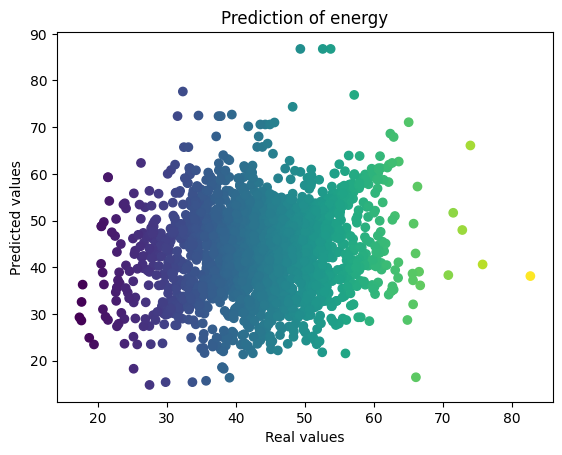

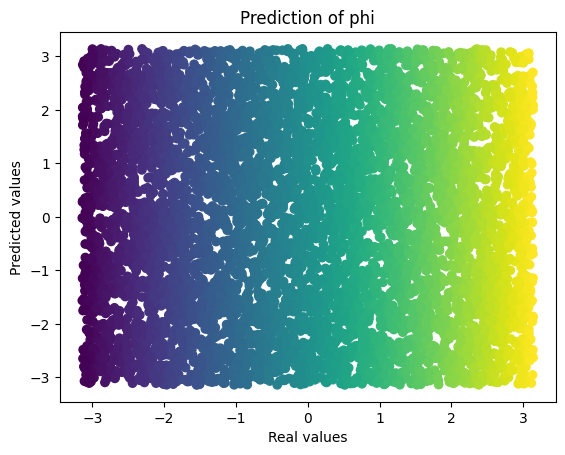

In [44]:
# prompt: # Predict two any features —e.g. energy and another one— based on the rest.
# # Here you can find an example of Multi-output tree regression.

# Define the features to predict
features_to_predict = ['energy', 'phi']

# Extract the features to predict and the remaining features
output_data = data[features_to_predict]
input_variables = data.columns[~data.columns.isin(features_to_predict)]
input_data = data[input_variables]

# Split the data into training and validation sets
input_train, input_validation, output_train, output_validation = train_test_split(
    input_data, output_data, test_size=0.2
)

# Create a multi-output regression model
model = DecisionTreeRegressor()
model.fit(input_train, output_train)

# Make predictions on the validation set
y_pred = model.predict(input_validation)

# Evaluate the model
loss = np.mean((output_validation - y_pred)**2)
print("Loss: %.5f" % loss)

# Visualize the predictions for the first feature
plt.scatter(output_validation.iloc[:, 0], y_pred[:, 0], c=output_validation.iloc[:, 0])
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Prediction of {}'.format(features_to_predict[0]))
plt.show()

# Visualize the predictions for the second feature
plt.scatter(output_validation.iloc[:, 1], y_pred[:, 1], c=output_validation.iloc[:, 1])
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Prediction of {}'.format(features_to_predict[1]))
plt.show()
